

# Phase 1 – Data Exploration & Initial Assessment


In [60]:


## 1. Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import warnings 
warnings.filterwarnings('ignore')


# 1. Load Dataset

In [61]:


df = pd.read_csv("Ecommerce_Delivery_Analytics_Modified.csv")
df


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD090001,CUST9695,Blinkit,15:29.5,25,Beverages,465.0,"Fast delivery, great service!",5,No,No
1,ORD090002,CUST1912,Blinkit,30:29.5,55,Grocery,1265.0,"Horrible experience, never ordering again.",1,Yes,Yes
2,ORD090003,CUST4785,Blinkit,26:29.5,11,Personal Care,1735.0,"Not fresh, disappointed.",2,No,Yes
3,ORD090004,CUST7815,Blinkit,49:29.5,31,Grocery,1255.0,Quick and reliable!,5,No,No
4,ORD090005,CUST4418,Blinkit,26:29.5,27,Fruits & Vegetables,301.0,Items missing from order.,2,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
10083,ORD093858,CUST8650,Blinkit,24:29.5,31,Beverages,493.0,Packaging could be better.,3,No,No
10084,ORD095862,CUST8251,Swiggy Instamart,35:29.5,37,Snacks,128.0,Good quality products.,4,No,No
10085,ORD093146,CUST9950,JioMart,37:29.5,12,Beverages,211.0,Delivery person was rude.,2,No,Yes
10086,ORD093306,CUST3598,JioMart,55:29.5,39,Personal Care,401.0,"Horrible experience, never ordering again.",1,No,Yes


#  Observation:
#  - Dataset has been loaded successfully using pd.read_csv()

#  2.View sample data

In [62]:


df.head()
 


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD090001,CUST9695,Blinkit,15:29.5,25,Beverages,465.0,"Fast delivery, great service!",5,No,No
1,ORD090002,CUST1912,Blinkit,30:29.5,55,Grocery,1265.0,"Horrible experience, never ordering again.",1,Yes,Yes
2,ORD090003,CUST4785,Blinkit,26:29.5,11,Personal Care,1735.0,"Not fresh, disappointed.",2,No,Yes
3,ORD090004,CUST7815,Blinkit,49:29.5,31,Grocery,1255.0,Quick and reliable!,5,No,No
4,ORD090005,CUST4418,Blinkit,26:29.5,27,Fruits & Vegetables,301.0,Items missing from order.,2,No,Yes



#  Observation:
- The preview shows the first few rows of the data and helps us check if the file loaded correctly.



#  3.Check structure — data types & missing overview

In [63]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10088 entries, 0 to 10087
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 10088 non-null  object 
 1   Customer ID              10088 non-null  object 
 2   Platform                 10008 non-null  object 
 3   Order Date & Time        10088 non-null  object 
 4   Delivery Time (Minutes)  10088 non-null  int64  
 5   Product Category         10058 non-null  object 
 6   Order Value (INR)        10018 non-null  float64
 7   Customer Feedback        10088 non-null  object 
 8   Service Rating           10088 non-null  int64  
 9   Delivery Delay           10088 non-null  object 
 10  Refund Requested         10088 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 867.1+ KB


In [64]:


df.describe()




,Delivery Time (Minutes),Order Value (INR),Service Rating
count,10088.000000,10018.000000,10088.000000
mean,29.613402,590.087043,3.226507
std,9.860493,416.305651,1.565510
min,5.000000,50.000000,1.000000
25%,23.000000,284.000000,2.000000
50%,30.000000,480.000000,3.000000
75%,36.000000,765.750000,5.000000
max,72.000000,2000.000000,5.000000


In [65]:


df.isnull().sum()




Order ID                    0
Customer ID                 0
Platform                   80
Order Date & Time           0
Delivery Time (Minutes)     0
Product Category           30
Order Value (INR)          70
Customer Feedback           0
Service Rating              0
Delivery Delay              0
Refund Requested            0
dtype: int64

In [66]:


df.isna().sum()


Order ID                    0
Customer ID                 0
Platform                   80
Order Date & Time           0
Delivery Time (Minutes)     0
Product Category           30
Order Value (INR)          70
Customer Feedback           0
Service Rating              0
Delivery Delay              0
Refund Requested            0
dtype: int64

In [67]:


df['Platform'].value_counts()




Platform
Swiggy Instamart    3371
Blinkit             3366
JioMart             3271
Name: count, dtype: int64

# Observation:
# The dataset is well balanced across platforms.
# Each platform contributes ~33% of total orders.
# No strong bias towards a single platform, making it suitable for comparative analysis (e.g., delivery delays, refunds, feedback by platform).


In [68]:


df['Product Category'].value_counts()



Product Category
Snacks                 1691
Fruits & Vegetables    1678
Personal Care          1676
Dairy                  1673
Beverages              1672
Grocery                1668
Name: count, dtype: int64

In [69]:


df['Customer Feedback'].value_counts()



Customer Feedback
Very late delivery, not happy.                822
Delivery person was rude.                     819
Packaging could be better.                    812
Easy to order, loved it!                      812
Very satisfied with the service.              779
Not fresh, disappointed.                      778
Excellent experience!                         776
Items missing from order.                     769
Good quality products.                        767
Horrible experience, never ordering again.    748
Quick and reliable!                           737
Wrong item delivered.                         736
Fast delivery, great service!                 733
Name: count, dtype: int64

In [70]:


df['Service Rating'].value_counts()



Service Rating
5    3837
2    3188
1    1484
3     812
4     767
Name: count, dtype: int64

In [71]:


df['Delivery Delay'].value_counts()



Delivery Delay
No     8717
Yes    1371
Name: count, dtype: int64

In [72]:


df['Refund Requested'].value_counts()



Refund Requested
No     5416
Yes    4672
Name: count, dtype: int64

In [73]:


df['Product Category'].unique()



array(['Beverages', 'Grocery', 'Personal Care', 'Fruits & Vegetables',
       'Snacks', 'Dairy', nan], dtype=object)


#   Value counts for categorical columns
# -Platform
# -Swiggy Instamart → 33,449
#  -Blinkit → 33,424
#  -jioMart → 33,127
# -Product Category
# -(Will show counts of categories like "Groceries", "Personal Care", "Beverages", etc.)
# -Customer Feedback
#  -Positive / Neutral / Negative counts
# -Service Rating
# -Count of 1 ⭐, 2 ⭐, 3 ⭐, 4 ⭐, 5 ⭐
# -Delivery Delay
# -Yes / No counts
# -Refund Requested
# -Yes / No counts


#  Shape of the dataset


In [74]:
df.shape

(10088, 11)

# Shape of the dataset 
- The dataset has 100,000 rows and 11 column

# Check missing value

In [75]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Platform                   80
Order Date & Time           0
Delivery Time (Minutes)     0
Product Category           30
Order Value (INR)          70
Customer Feedback           0
Service Rating              0
Delivery Delay              0
Refund Requested            0
dtype: int64

# Percentage of Missing Values

In [76]:
round(df.isnull().sum()/len(df)*100,2)

Order ID                   0.00
Customer ID                0.00
Platform                   0.79
Order Date & Time          0.00
Delivery Time (Minutes)    0.00
Product Category           0.30
Order Value (INR)          0.69
Customer Feedback          0.00
Service Rating             0.00
Delivery Delay             0.00
Refund Requested           0.00
dtype: float64

# Columns with missing values
# Observations
- No Missing Values (0.00%)
-Order ID, Customer ID, Order Date & Time, Delivery Time (Minutes), Customer Feedback, Service Rating, Delivery Delay, Refund Requested
- ✅ These columns are complete and don’t require imputation.
- Columns with Small Amount of Missing Data
-Platform → 0.79% missing
- Product Category → 0.30% missing
- Order Value (INR) → 0.69% missing
- These values are relatively low (<1%), so you can either drop the rows with missing values or apply simple imputation (e.g., fill with mode for categorical, mean/median for numerical).
-Overall Quality
-The dataset is quite clean — missing values are minimal (<1%).
-Imputation or row removal won’t significantly impact the dataset size or analysis.

# Data types

In [77]:
df.dtypes

Order ID                    object
Customer ID                 object
Platform                    object
Order Date & Time           object
Delivery Time (Minutes)      int64
Product Category            object
Order Value (INR)          float64
Customer Feedback           object
Service Rating               int64
Delivery Delay              object
Refund Requested            object
dtype: object


# Data types of each column
 - Order ID → object (unique identifier)
 - Customer ID → object (identifier)
- Platform → object (categorical)
- nOrder Date & Time → object (timestamp as string, can be converted to datetime)
- Delivery Time (Minutes) → int64 (numeric)
 - Product Category → object (categorical)
- Order Value (INR) → int64 (numeric)
- Customer Feedback → object (categorical)
- Service Rating → int64 (numeric ordinal)
- Delivery Delay → object (Yes/No categorical)
- Refund Requested → object (Yes/No categorical)

#  Checking for Duplicates

In [78]:
df.duplicated().sum()

88

# # Observations:
- Duplicates Exist → There are 88 rows that are exact copies of others in the dataset.
- Impact on Analysis
-If kept, duplicates may bias results (e.g., inflating order counts, revenues, customer frequency).
- Removing them improves data accuracy and reliability.
- Action
- Safest approach: remove duplicates with

# outliers

In [79]:


import pandas as pd

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows within bounds
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# ✅ Apply to your dataset columns
for col in ["Delivery Time (Minutes)", "Order Value (INR)", "Service Rating"]:
    if col in df.columns:   # check column exists in your dataset
        df = remove_outliers_iqr(df, col)

print("✅ Outliers removed. New dataset shape:", df.shape)



✅ Outliers removed. New dataset shape: (9492, 11)







# phase 2 - Data cleaning

# Dealing with null values


In [80]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Platform                   78
Order Date & Time           0
Delivery Time (Minutes)     0
Product Category           30
Order Value (INR)           0
Customer Feedback           0
Service Rating              0
Delivery Delay              0
Refund Requested            0
dtype: int64

In [81]:
df['Platform'].fillna(df['Platform'].mode()[0],inplace = True)

In [82]:
df['Platform'].isna().sum()

0

In [83]:
df['Product Category'].fillna('Unspecified',inplace = True)

In [84]:
df['Product Category'].isna().sum()

0

In [85]:
df['Order Value (INR)'].fillna(df['Order Value (INR)'].median(),inplace = True)

In [86]:
df['Order Value (INR)'].isna().sum()

0

In [87]:
df.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

# ## dealing with duplicates

In [88]:
df.duplicated().sum()

82

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.duplicated().sum()

0

In [91]:
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD090001,CUST9695,Blinkit,15:29.5,25,Beverages,465.0,"Fast delivery, great service!",5,No,No
1,ORD090002,CUST1912,Blinkit,30:29.5,55,Grocery,1265.0,"Horrible experience, never ordering again.",1,Yes,Yes
3,ORD090004,CUST7815,Blinkit,49:29.5,31,Grocery,1255.0,Quick and reliable!,5,No,No
4,ORD090005,CUST4418,Blinkit,26:29.5,27,Fruits & Vegetables,301.0,Items missing from order.,2,No,Yes
5,ORD090006,CUST2217,JioMart,20:29.5,5,Grocery,1272.0,Packaging could be better.,3,No,No


# # Categorical vs Categorica

In [92]:
df.groupby("Product Category")["Customer Feedback"].count()

Product Category
Beverages              1636
Dairy                  1637
Fruits & Vegetables    1647
Grocery                1609
Personal Care          1194
Snacks                 1657
Unspecified              30
Name: Customer Feedback, dtype: int64

# Categorical vs Numerical

In [93]:
df.groupby("Platform")["Order Value (INR)"].sum()

Platform
Blinkit             1703664.0
JioMart             1638661.0
Swiggy Instamart    1674251.0
Name: Order Value (INR), dtype: float64

#  Numerical vs Numerical:

In [94]:
df[["Delivery Time (Minutes)","Service Rating"]].corr()

,Delivery Time (Minutes),Service Rating
Delivery Time (Minutes),1.000000,0.009834
Service Rating,0.009834,1.000000


# visualizations
# 1. How do delivery times vary across different platforms?

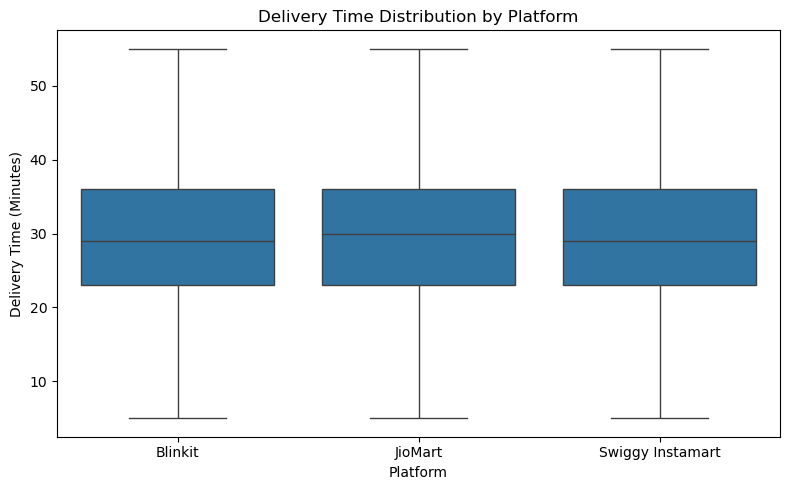

In [95]:


plt.figure(figsize=(8,5))
sns.boxplot(x="Platform", y="Delivery Time (Minutes)", data=df)
plt.title("Delivery Time Distribution by Platform")
plt.ylabel("Delivery Time (Minutes)")
plt.xlabel("Platform")
plt.tight_layout()
plt.show()

# 2.Does product category influence delivery delays and refunds

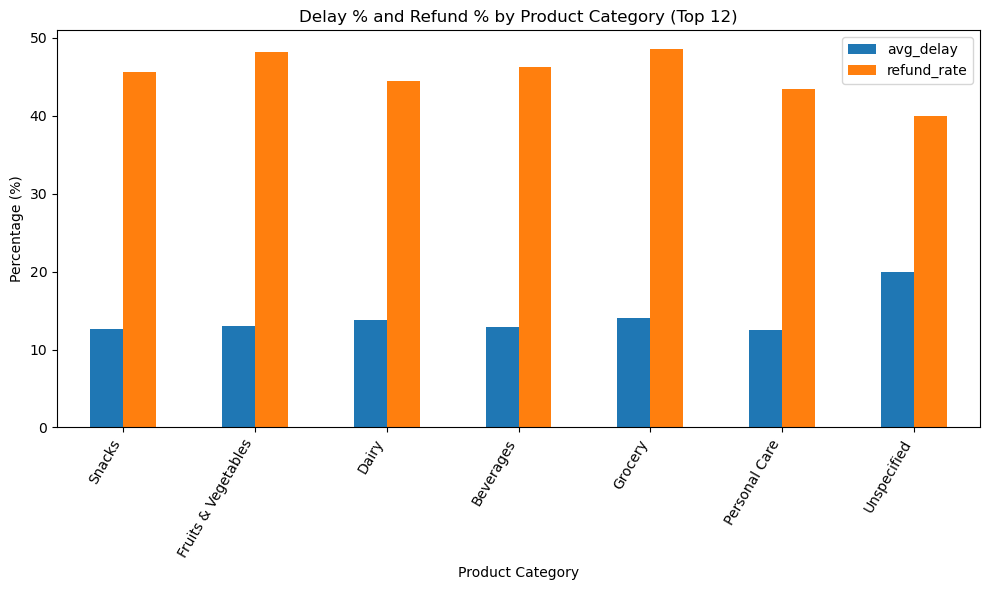

In [96]:


cat_summary = df.groupby("Product Category").agg(
    avg_delay=("Delivery Delay", lambda s: (s=="Yes").mean()*100),
    refund_rate=("Refund Requested", lambda s: (s=="Yes").mean()*100),
    orders=("Order ID", "count")
).sort_values("orders", ascending=False).head(12)

cat_summary[['avg_delay','refund_rate']].plot(kind='bar', figsize=(10,6))
plt.title("Delay % and Refund % by Product Category (Top 12)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# 3.What is the relationship between order value and customer satisfaction

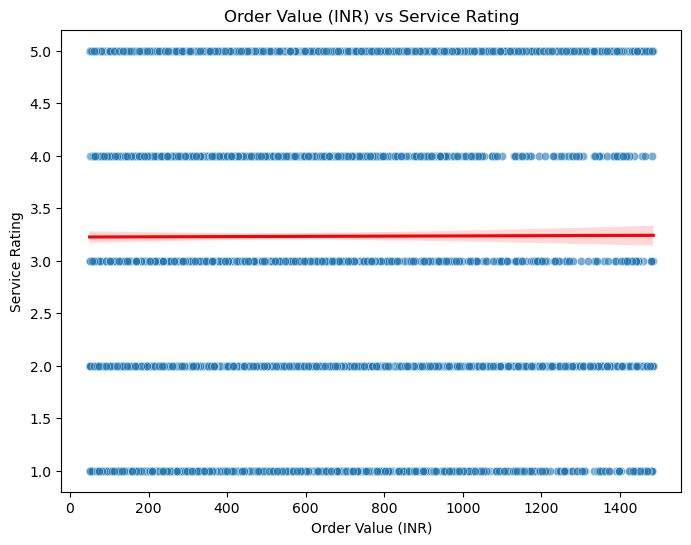

In [97]:


plt.figure(figsize=(8,6))
sns.scatterplot(x="Order Value (INR)", y="Service Rating", data=df, alpha=0.6)
sns.regplot(x="Order Value (INR)", y="Service Rating", data=df, scatter=False, color="red")
plt.title("Order Value (INR) vs Service Rating")
plt.xlabel("Order Value (INR)")
plt.ylabel("Service Rating")
plt.show()

# 4. Customer feedback vs service rating

In [98]:
a=df["Customer Feedback"].value_counts()
b=df["Service Rating"].value_counts()

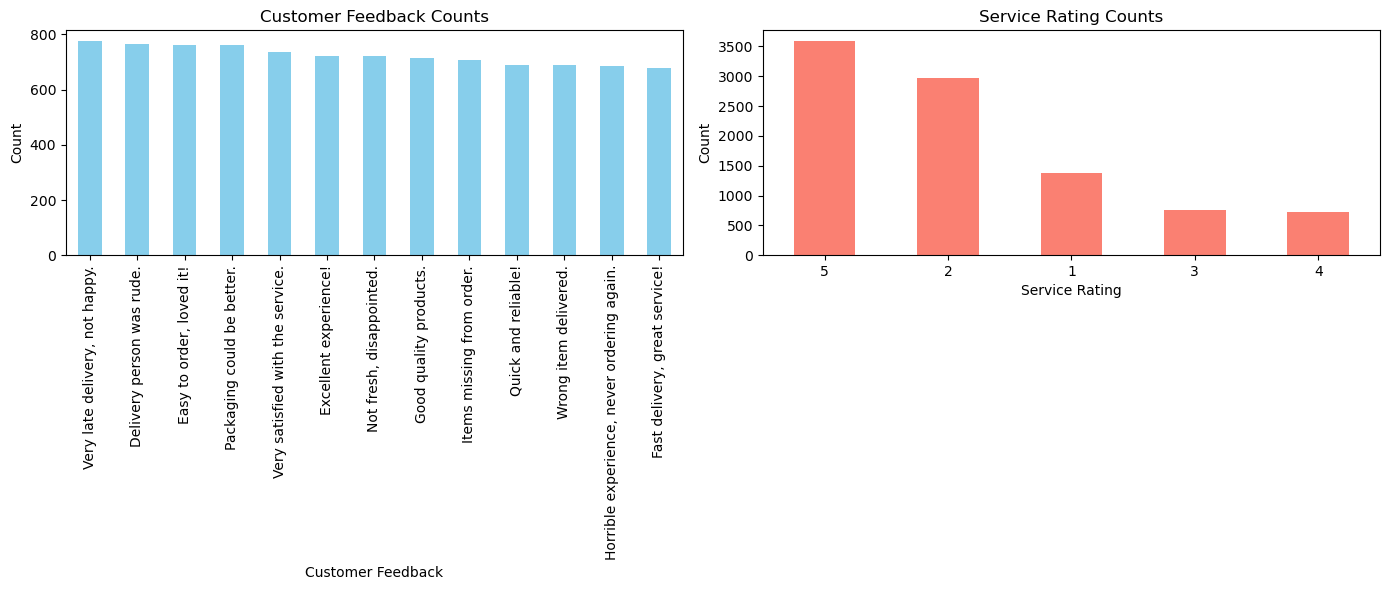

In [99]:


import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Plot Customer Feedback counts
a.plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Customer Feedback Counts")
axes[0].set_xlabel("Customer Feedback")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=90)

# Plot Service Rating counts
b.plot(kind="bar", ax=axes[1], color="salmon")
axes[1].set_title("Service Rating Counts")
axes[1].set_xlabel("Service Rating")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()



#  5. Factors contributing to refund requests

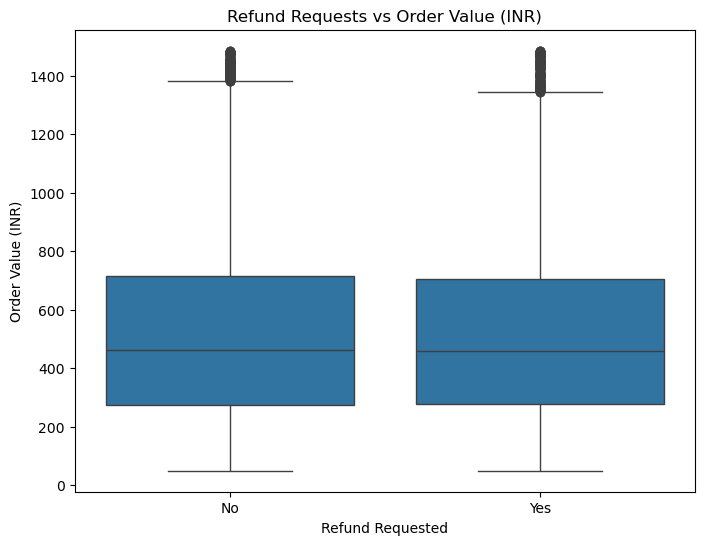

In [100]:


plt.figure(figsize=(8,6))
sns.boxplot(x="Refund Requested", y="Order Value (INR)", data=df)
plt.title("Refund Requests vs Order Value (INR)")
plt.ylabel("Order Value (INR)")
plt.xlabel("Refund Requested")
plt.show()

